In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import os
import pandas as pd
import xarray as xr

In [2]:
def read_dat(filepath: os.path.abspath) -> xr.Dataset:
    """
    Opens a Picarro G2000 .dat file that has been modified by Anna McAuliffe from NOAA GML.
    Exports contents as an xarray dataset.
    
    :param filepath: The filepath of the file to import.
    :return: An xarray dataset containing the contents of the .dat file.
    """
    
    with open(filepath, 'r') as _file:
        df = pd.read_csv(_file, header = 0, sep = '\s+')
        
        df['time'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])
        df.index = df.time
        
        ds = df.to_xarray()
    return ds

In [3]:
fp = 'C:/Users\Ian\phd\projects\python3-crlx\_scratch\CFADS2705-20240821-000006Z-DataLog_User.dat'
ds = read_dat(fp)

In [4]:
dry = ds.where(ds.MPVPosition == 1, drop = True) # Drop data that is not path 1
direct =  ds.where(ds.MPVPosition == 8, drop = True) # drop data that is not path 8
standard = ds.where(ds.MPVPosition == 2, drop = True) # drop data that is not path 2

In [5]:
dry_co2 = dry.where(dry.species == 1, drop = True)
direct_co2 = direct.where(direct.species == 1, drop = True)

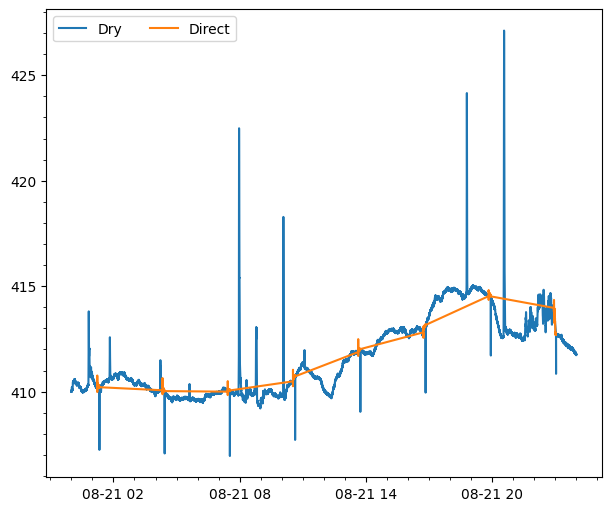

In [6]:
nrow = 1
ncol = 1
figsize = (6,5)

fig, ax = plt.subplots(nrow, ncol, figsize = figsize, constrained_layout = True)

ax.plot(dry_co2.time, dry_co2.CO2_dry, label = 'Dry')
ax.plot(direct_co2.time, direct_co2.CO2_dry, label = 'Direct')

ax.legend(loc = 'upper left', ncol = 2)

ax.xaxis.set_major_locator(mdates.HourLocator(interval = 6))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval = 1))

ax.yaxis.set_major_locator(mticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(1))

